<a href="https://colab.research.google.com/github/robbytbg/Port2/blob/main/ml_port.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
df=pd.read_csv('/content/classification_in_asteroseismology.csv')
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values


In [31]:
df

,POP,Dnu,numax,epsilon
0,1,4.44780,43.06289,0.985
1,0,6.94399,74.07646,0.150
2,1,2.64571,21.57891,0.855
3,1,4.24168,32.13189,0.840
4,0,10.44719,120.37356,0.275
...,...,...,...,...
996,0,5.51582,49.99920,0.060
997,1,4.14823,32.09069,0.930
998,1,3.98294,30.90257,0.880
999,1,4.33893,45.62183,0.975


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

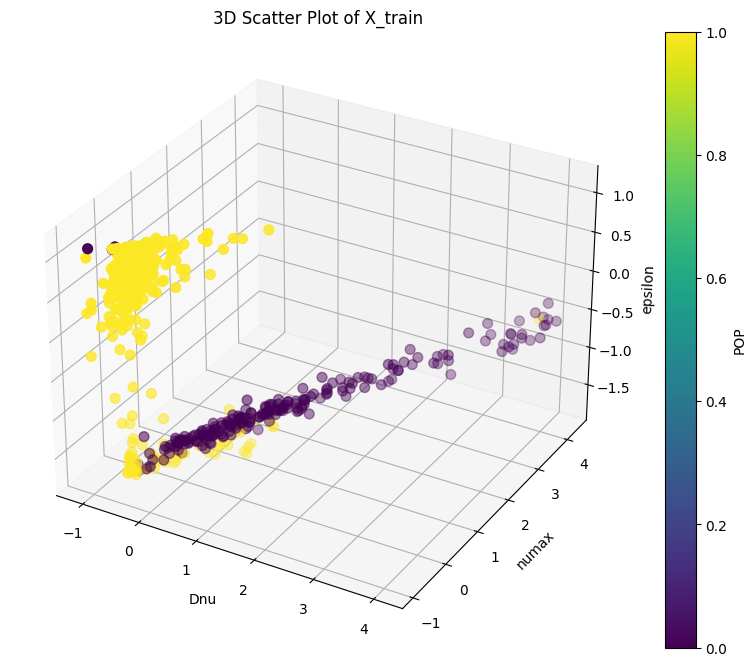

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    X_train[:,0],
    X_train[:,1],
    X_train[:,-1],
    c=y_train,
    cmap='viridis',
    marker='o',
    s=50
)

# Set labels
ax.set_xlabel('Dnu')
ax.set_ylabel('numax')
ax.set_zlabel('epsilon')

# Create a colorbar
colorbar = fig.colorbar(scatter, ax=ax, label='POP')

plt.title('3D Scatter Plot of X_train')
plt.show()


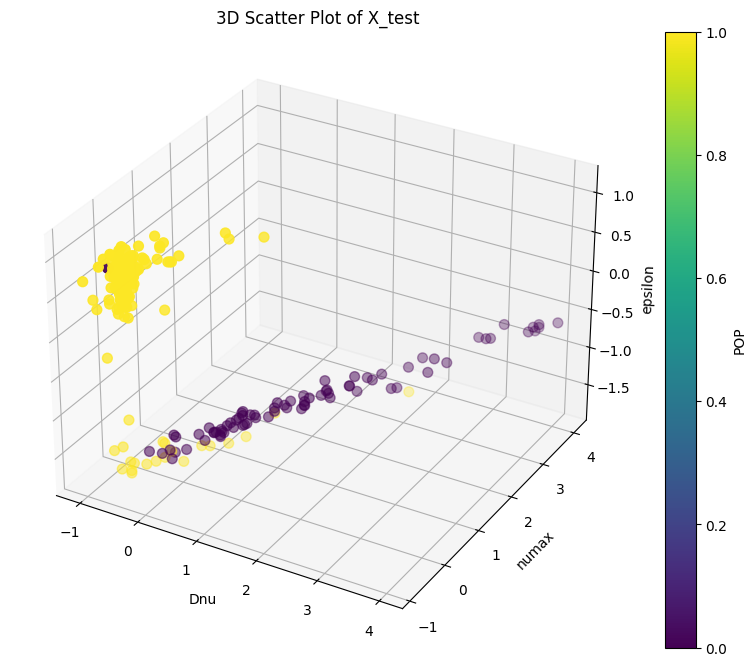

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_test[:,0],
    X_test[:,1],
    X_test[:,-1],
    c=y_test,
    cmap='viridis',
    marker='o',
    s=50
)

ax.set_xlabel('Dnu')
ax.set_ylabel('numax')
ax.set_zlabel('epsilon')

colorbar = fig.colorbar(scatter, ax=ax, label='POP')

plt.title('3D Scatter Plot of X_test')
plt.show()

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 73   4]
 [  5 169]]


0.9641434262948207

In [38]:
print(classifier.predict(sc.transform([[4.4478,43.06289,0.985]])))

[1]
